<h2>DENGAI: PREDICTING DISEASE SPREAD</h2>

Usando dados ambientais coletados por várias agências do governo federal dos EUA – desde os Centros de Controle e Prevenção de Doenças até a Administração Oceânica e Atmosférica Nacional do Departamento de Comércio dos EUA – para prever o número de casos de dengue relatados a cada semana em San Juan, Porto Rico e Iquitos, Peru. Este desafio faz parte de uma competição DrivenData: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/.

O objetivo é prever o número de casos de dengue a cada semana (em cada local) com base em variáveis ​​ambientais que descrevem mudanças de temperatura, precipitação, vegetação e muito mais.

O conjunto de dados contém as seguintes informações sobre San Juan e Iquitos:

<ul>
    <li><font color=blue>city</font> – Abreviações das cidades: <font color=red>sj</font> for San Juan and <font color=red>iq</font> for Iquitos</li>
    <li><font color=blue>year</font> – Ano</li>
    <li><font color=blue>weekofyear</font> – Número da semana de um ano específico</li>
    <li><font color=blue>week_start_date</font> – Date de início da semana, no formato: yyyy-mm-dd format</li>
    <h4>NOAA's GHCN medições climáticas diárias da estação meteorológica</h4>
    <li><font color=blue>station_max_temp_c</font> – Temperatura Máxima</li>
    <li><font color=blue>station_min_temp_c</font> – Temperatura Mínima</li>
    <li><font color=blue>station_avg_temp_c</font> – Temperatura Média</li>
    <li><font color=blue>station_precip_mm</font> – Precipitação Total</li>
    <li><font color=blue>station_diur_temp_rng_c</font> – Amplitude de Temperatura Diúrna</li>
    <h4>Medições de precipitação do satélite PERSIANN (0.25x0.25 degree scale)</h4>
    <li><font color=blue>precipitation_amt_mm</font> – Precipitação Total</li>
    <h4>NOAA's NCEP Medições de reanálise do sistema de previsão climática (0.5x0.5 degree scale)</h4>
    <li><font color=blue>reanalysis_sat_precip_amt_mm</font> – Precipitação Total</li>
    <li><font color=blue>reanalysis_dew_point_temp_k</font> – Temperatura média do ponto de orvalho</li>
    <li><font color=blue>reanalysis_air_temp_k</font> – Temperatura média do ar</li>
    <li><font color=blue>reanalysis_relative_humidity_percent</font> – Umidade relativa média</li>
    <li><font color=blue>reanalysis_specific_humidity_g_per_kg</font> – Umidade específica média</li>
    <li><font color=blue>reanalysis_precip_amt_kg_per_m2</font> – Precipitação total</li>
    <li><font color=blue>reanalysis_max_air_temp_k</font> – Temperatura máxima do ar</li>
    <li><font color=blue>reanalysis_min_air_temp_k</font> – Temperatura mínima do ar</li>
    <li><font color=blue>reanalysis_avg_temp_k</font> – Temperatura média do ar</li>
    <li><font color=blue>reanalysis_tdtr_k</font> – Amplitude de temperatura diúrna</li>
    <h4>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</h4>
    <li><font color=blue>ndvi_se</font> – Pixel à sudeste do centróide da cidade</li>
    <li><font color=blue>ndvi_sw</font> – Pixel à sudoeste do centróide da cidade</li>
    <li><font color=blue>ndvi_ne</font> – Pixel à nordeste do centróide da cidade</li>
    <li><font color=blue>ndvi_nw</font> – Pixel à noroeste do centróide da cidade</li> 
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import os
#constantes
#percentual de dados para conjunto de validação
PERC_VALID = 0.3

data_path = 'D:\Documents\Google Drive\Competicoes\DrivenData\DengueAI'
train_data_file = os.path.join(data_path,'dengue_features_train.csv')
test_data_file = os.path.join(data_path,'dengue_features_test.csv')
labels_file = os.path.join(data_path,'dengue_labels_train.csv')

#usando a cidade, ano e o número da semana como índice composto
train_set = pd.read_csv(train_data_file, index_col=[0,1,2])
test_set = pd.read_csv(test_data_file, index_col=[0,1,2])
label_set = pd.read_csv(labels_file, index_col=[0,1,2])

train_set.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', 1990, 18) to ('iq', 2010, 25)
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        1456 non-null   object 
 1   ndvi_ne                                1262 non-null   float64
 2   ndvi_nw                                1404 non-null   float64
 3   ndvi_se                                1434 non-null   float64
 4   ndvi_sw                                1434 non-null   float64
 5   precipitation_amt_mm                   1443 non-null   float64
 6   reanalysis_air_temp_k                  1446 non-null   float64
 7   reanalysis_avg_temp_k                  1446 non-null   float64
 8   reanalysis_dew_point_temp_k            1446 non-null   float64
 9   reanalysis_max_air_temp_k              1446 non-null   float64
 10  reanalysis_min_air_temp_k              1446 n

<h3>Preparação dos dados</h3>

A base de dados de treinamento do problema tem 1456 entradas divididas entre registros de Iquitos e San Juan. Exceto pela variável <font color='blue'>week_start_date</font> que é do tipo <font color='red'>object</font>, todas as demais variáveis são do tipo ponto flutuante. Trata-se de um problema que envolve dados predominantemente quantitativos e contínuos.

Como cada cidade tem sua própria dinâmica de espalhamento da doença, seus dados devem ser preparados e analizados separadamente.

In [3]:
sj_train_set = train_set.loc['sj'].copy()
iq_train_set = train_set.loc['iq'].copy()

print(sj_train_set.info())
print(iq_train_set.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 936 entries, (1990, 18) to (2008, 17)
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        936 non-null    object 
 1   ndvi_ne                                745 non-null    float64
 2   ndvi_nw                                887 non-null    float64
 3   ndvi_se                                917 non-null    float64
 4   ndvi_sw                                917 non-null    float64
 5   precipitation_amt_mm                   927 non-null    float64
 6   reanalysis_air_temp_k                  930 non-null    float64
 7   reanalysis_avg_temp_k                  930 non-null    float64
 8   reanalysis_dew_point_temp_k            930 non-null    float64
 9   reanalysis_max_air_temp_k              930 non-null    float64
 10  reanalysis_min_air_temp_k              930 non-null    flo

Ao todo são 936 registros da cidade de San Juan, com dados de 1990 à 2008, já Iquitos possui apenas 520 registros, com dados de 2000 à 2010. Em ambos os conjuntos existem dados ausentes em todas as variáveis numéricas, mas a que mais se destaca é a <font color='blue'>ndvi_ne</font> para cidade de San Juan.

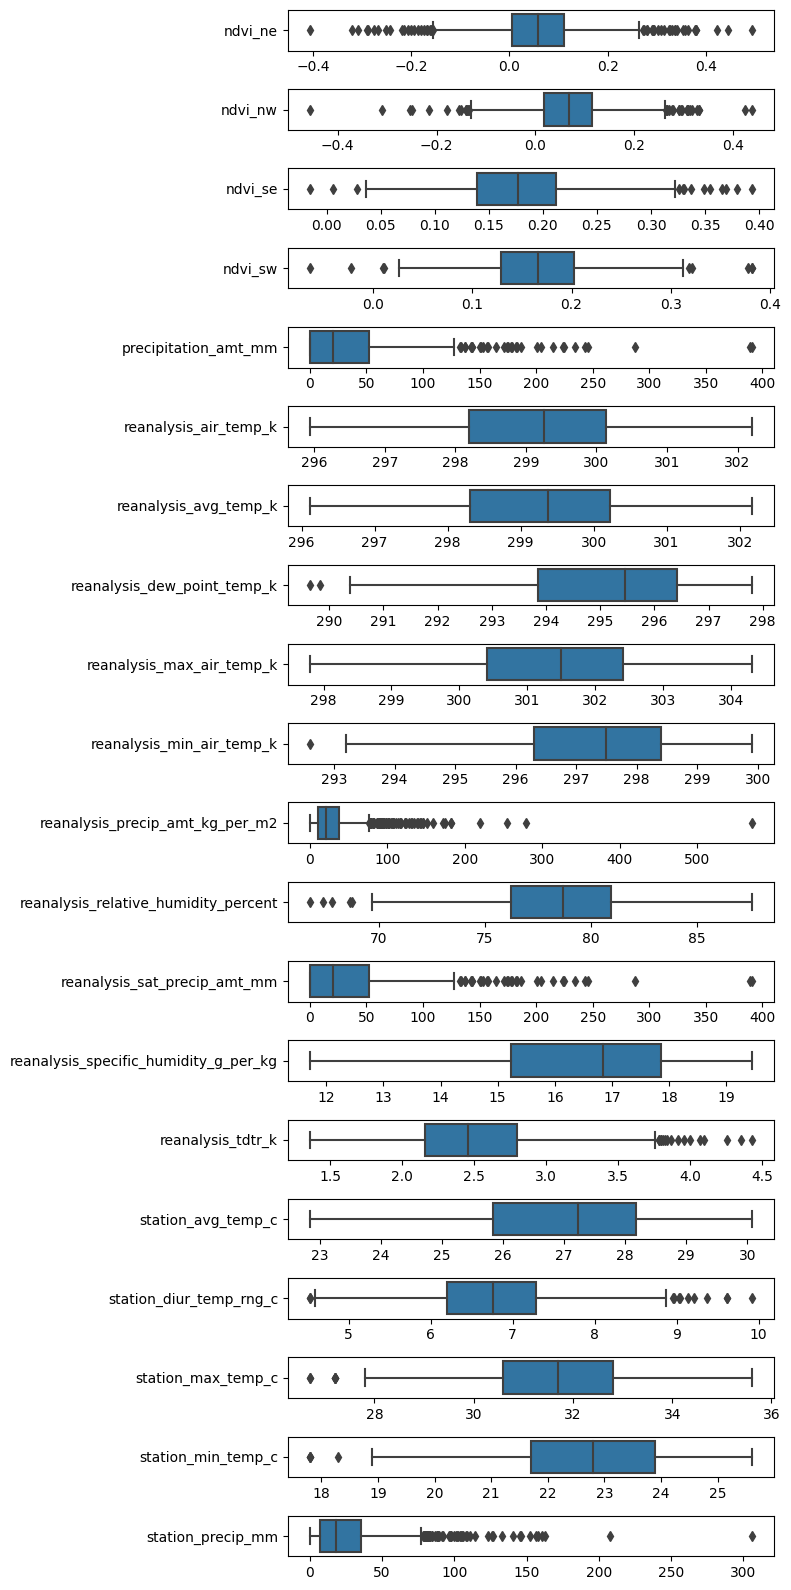

In [4]:
#boxplot das variáveis escalares
cols = [col for col in sj_train_set.columns if 'week_start' not in col]

fig,axs = plt.subplots(len(cols),1,figsize=(8,16))
for i in range(0,len(cols)):
    sns.boxplot(data=sj_train_set[[cols[i]]], orient='h', ax=axs[i])
    #axs[i].set_title('Boxplot')
fig.tight_layout()
plt.show()

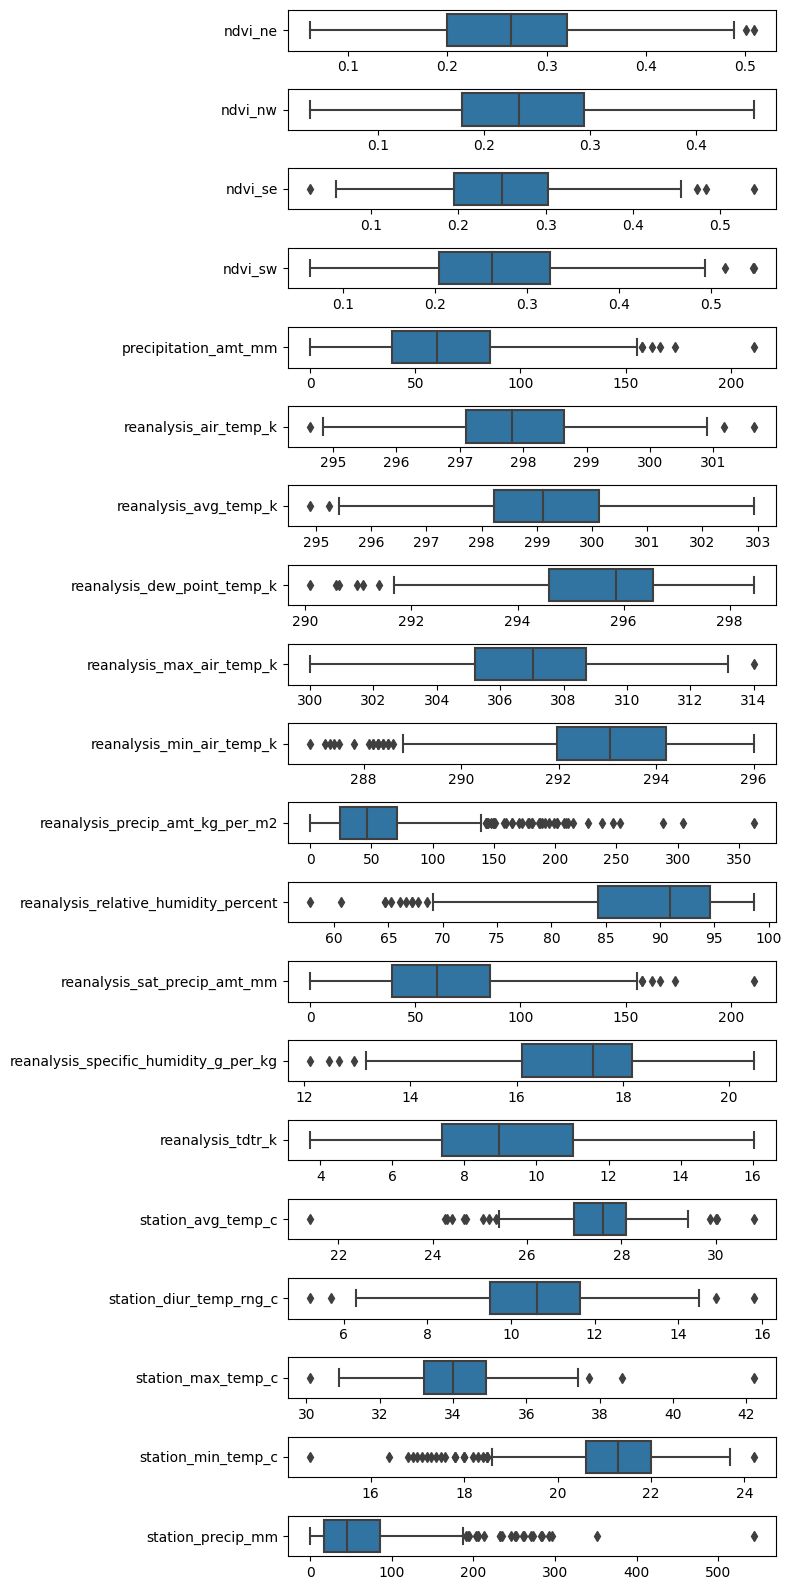

In [5]:
#boxplot das variáveis escalares
cols = [col for col in iq_train_set.columns if 'week_start' not in col]

fig,axs = plt.subplots(len(cols),1,figsize=(8,16))
for i in range(0,len(cols)):
    sns.boxplot(data=iq_train_set[[cols[i]]], orient='h', ax=axs[i])
    #axs[i].set_title('Boxplot')
fig.tight_layout()
plt.show()

Nenhuma das variáveis tem outliers significativos. Algumas tem muitos valores fora dos limites estabelecidos pelo boxplot, que considera 1,5 da distância interquartílica (Q3-Q1) para abaixo do primeiro e acima do terceiro quartil. Mas não são considerados tão discrepantes para demandar um tratamento.

O principal ponto de atenção são os dados ausentes. Esses dados serão interpolados seguindo uma função linear de 1ª ordem.

Text(0, 0.5, 'ndvi_ne')

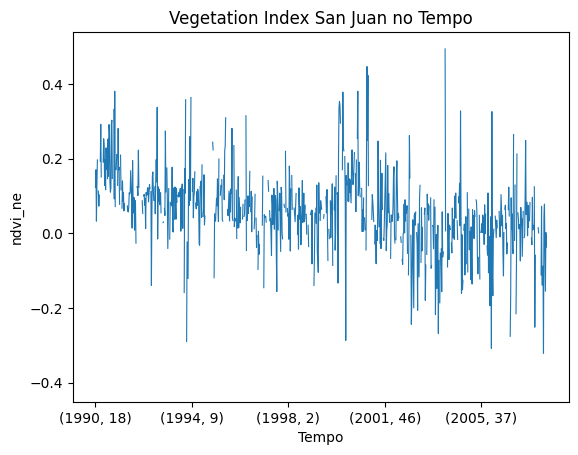

In [6]:
sj_train_set.ndvi_ne.plot.line(lw=0.8)

plt.title('Vegetation Index San Juan no Tempo')
plt.xlabel('Tempo')
plt.ylabel('ndvi_ne')

Text(0, 0.5, 'ndvi_ne')

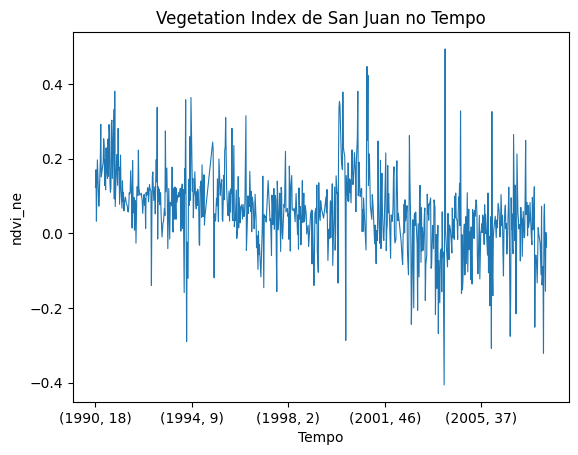

In [7]:
def interpolate(data):
    """data é o dataframe"""
    data1 = data.reset_index(inplace=False, drop=True)
    x = range(1,len(data1)+1)
    for col in data1.select_dtypes(include=[float]).columns:
        #para cada coluna, pega o índice, iniciando do valor 1, e o valor em y associado
        #apenas para linhas onde o valor corresponde é diferente de NaN
        xp = data1[col][data1[col].notna()].index+1
        yp = data1[col][data1[col].notna()].values
        #interpola os valores com todos os índices, completando a série de dados
        y = np.interp(x,xp,yp)
        data1[col] = y
    data1.set_index(data.index, inplace=True)
    return data1
sj_train_treated = interpolate(sj_train_set)
iq_train_treated = interpolate(iq_train_set)

sj_train_treated.ndvi_ne.plot.line(lw=0.8)

plt.title('Vegetation Index de San Juan no Tempo')
plt.xlabel('Tempo')
plt.ylabel('ndvi_ne')

<h3>Análise Exploratória dos Dados</h3>

Iniciando a análise exploratória a partir da variável alvo, que deve ser predita.

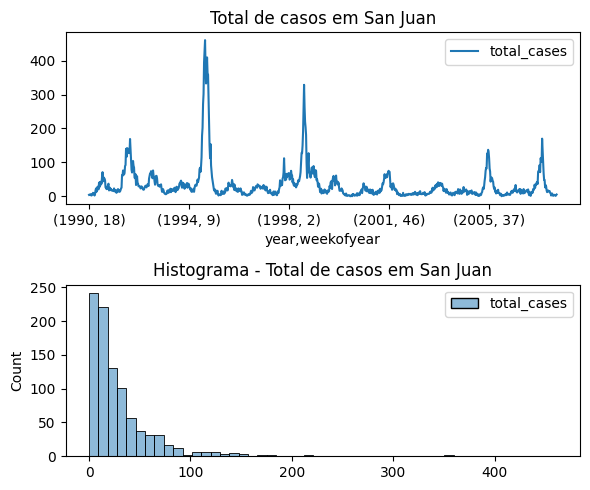

Estatísticas da cidade de San Juan
       total_cases
count   936.000000
mean     34.180556
std      51.381372
min       0.000000
25%       9.000000
50%      19.000000
75%      37.000000
max     461.000000


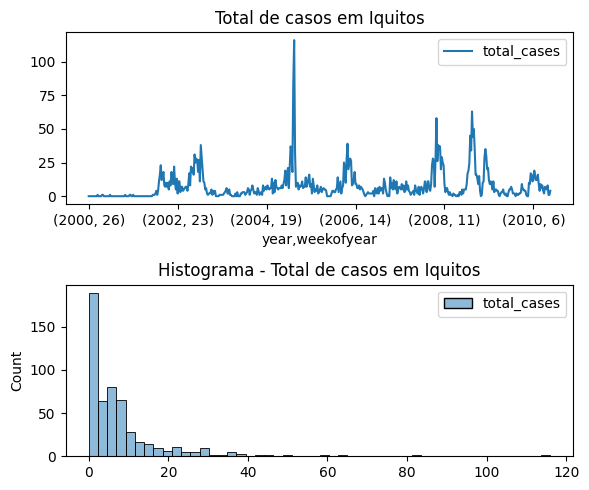

Estatísticas da cidade de Iquitos
       total_cases
count   520.000000
mean      7.565385
std      10.765478
min       0.000000
25%       1.000000
50%       5.000000
75%       9.000000
max     116.000000


In [8]:
iq_label_set = label_set.loc['iq'].copy()
sj_label_set = label_set.loc['sj'].copy()

fig,ax = plt.subplots(2,1, figsize=(6,5))
sj_label_set.plot(ax=ax[0])
sns.histplot(data=sj_label_set, ax=ax[1], bins=50)
ax[0].set_title('Total de casos em San Juan')
ax[1].set_title('Histograma - Total de casos em San Juan')
fig.tight_layout()
plt.show()

print('Estatísticas da cidade de San Juan')
print(sj_label_set.describe())

fig,ax = plt.subplots(2,1, figsize=(6,5))
iq_label_set.plot(ax=ax[0])
sns.histplot(data=iq_label_set, ax=ax[1], bins=50)
ax[0].set_title('Total de casos em Iquitos')
ax[1].set_title('Histograma - Total de casos em Iquitos')
fig.tight_layout()
plt.show()

print('Estatísticas da cidade de Iquitos')
print(iq_label_set.describe())

É interessante observar que a cidade de San Juan tem uma incidência de casos de dengue mais marcada pela sazonalidade do que a cidade de Iquitos. É possível ver mais claramente, que se retirados os períodos de surto, a disseminação da dengue em San Juan apresenta ciclos mais definidos de altos e baixos. O que não é tão evidente na cidade de Iquitos. 

É curioso ver que nos primeiros anos a cidade de Iquitos quase não teve registros da doença, mas nos anos seguintes até o final da medição, ocorreram surtos de casos quase que anualmente. Apesar haver muitos picos de surto da doença em Iquitos, a amplitude deles é relativamente baixa se comparados aos picos de surto registrados em San Juan.
Uma pesquisa rápida mostra que a população de Iquitos em 2015 era de 159.769 habitantes (https://pt.city-facts.com/iquitos/population) enquanto a de San Juan era de 374.884 habitantes no mesmo ano (https://pt.city-facts.com/san-juan-chateu/population). Dessa forma é natural que Iquitos registre picos menores que San Juan.

Para analisar a distribuição dos dados e a própria sazonalidade, é importante reduzir a distorção causada pelo picos de surtos.

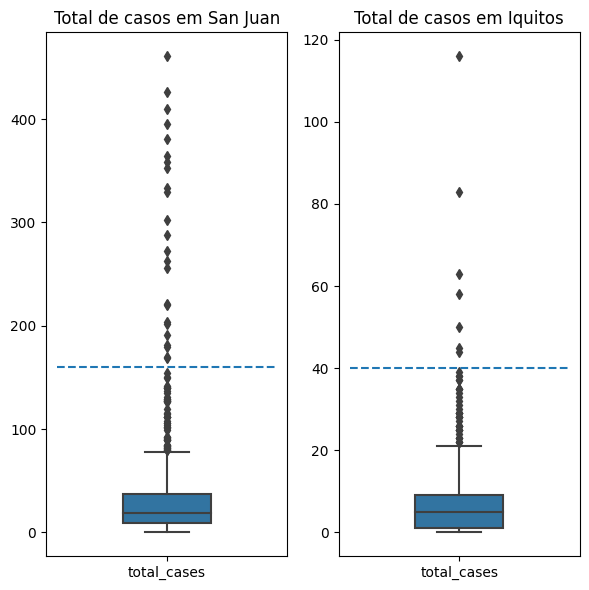

In [9]:
fig,axs = plt.subplots(1,2,figsize=(6,6))
sns.boxplot(data=sj_label_set, orient='v', ax=axs[0])
axs[0].set_title('Total de casos em San Juan')
sns.lineplot(x=[-1,1],y=[160,160], ax=axs[0], linestyle='dashed')
sns.boxplot(data=iq_label_set, orient='v', ax=axs[1])
sns.lineplot(x=[-1,1],y=[40,40], ax=axs[1], linestyle='dashed')
axs[1].set_title('Total de casos em Iquitos')
fig.tight_layout()
plt.show()

Não é possível cortar os valores a partir dos limites do boxplot, pois perderia-se muita informação sobre os períodos de surto. O que se deseja é apenas minimizar o efeito de distorção causado pelos grandes picos. Utilizando o boxplot é possível traçar um limite baseado na quantidade de valores presentes e concentrados em uma determinada faixa da região de outliers do gráfico. Assim, pode-se traçar os limites de 160 e 40, para San Juan e Iquitos, respectivamente, como mostrado nos gráficos acima.

Os cortes serão realizados considerando esses limites.

Outro ponto que será tratado se referem aos dados iniciais da medição de Iquitos. O período onde o registro de doenças é praticamente nulo pode atrapalhar na avaliação do modelo para os anos subsequentes. Esse período será retirado dos dados utilizados para o treinamento. Foi verificado que o período inicial com poucos ou nenhum registro de doenças em Iquitos vai até a semana 46 de 2001 (linha 72 do DataFrame).

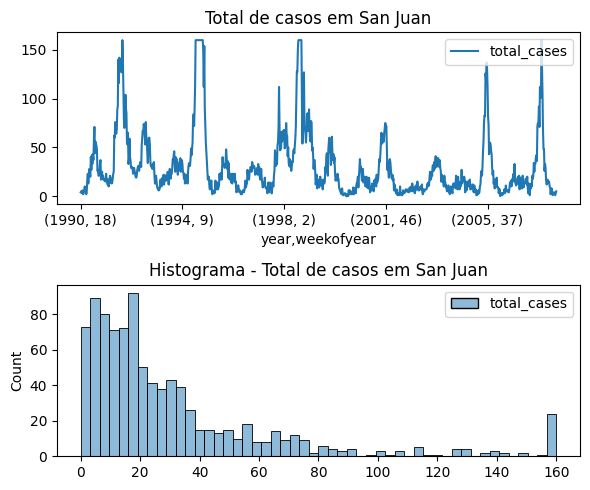

Estatísticas da cidade de San Juan
       total_cases
count   936.000000
mean     30.880342
std      34.208774
min       0.000000
25%       9.000000
50%      19.000000
75%      37.000000
max     160.000000


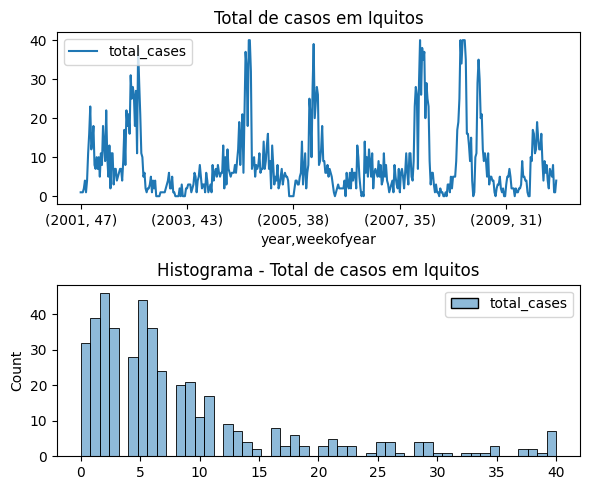

Estatísticas da cidade de Iquitos
       total_cases
count   448.000000
mean      8.363839
std       8.927460
min       0.000000
25%       2.000000
50%       5.000000
75%      10.000000
max      40.000000


In [10]:
def process_label_data(label_set, threshold_sj, threshold_iq, drop_index_iq):
    """label_set = conjunto de dados de rótulos,
    threshold_sj = limite para corte nos valores de pico para cidade de San Juan,
    threshold_iq = limite para corte nos valores de pico para cidade de Iquitos
    drop_index_iq = indice para corte dos primeiros valores medidos em Iquitos"""
    iq_label = label_set.loc['iq'].copy()
    sj_label = label_set.loc['sj'].copy()
    sj_label[sj_label['total_cases']>threshold_sj]= threshold_sj
    iq_label[iq_label['total_cases']>threshold_iq]= threshold_iq
    #remove as primeiras medições de Iquitos que registram poucos em nenhum caso de dengue
    iq_label.drop(iq_label[0:drop_index_iq].index, inplace=True)
    return sj_label, iq_label

sj_label_cut, iq_label_cut = process_label_data(label_set, 160,40,72)

fig,ax = plt.subplots(2,1, figsize=(6,5))
sj_label_cut.plot(ax=ax[0])
sns.histplot(data=sj_label_cut, ax=ax[1], bins=50)
ax[0].set_title('Total de casos em San Juan')
ax[1].set_title('Histograma - Total de casos em San Juan')
fig.tight_layout()
plt.show()
print('Estatísticas da cidade de San Juan')
print(sj_label_cut.describe())

fig,ax = plt.subplots(2,1, figsize=(6,5))
iq_label_cut.plot(ax=ax[0])
sns.histplot(data=iq_label_cut, ax=ax[1], bins=50)
ax[0].set_title('Total de casos em Iquitos')
ax[1].set_title('Histograma - Total de casos em Iquitos')
fig.tight_layout()
plt.show()
print('Estatísticas da cidade de Iquitos')
print(iq_label_cut.describe())

Em termos de modelo estatístico, a variável alvo é uma variável aleatória de contagem, com valores sempre inteiros e maiores ou iguais a zero. Ao limitar os valores de pico, observou-se uma aproximação da média e do desvio padrão das variáveis, o que indica que a variável aleatória de total de casos poderia ser modelada como uma variável de Poisson (que possui média =  desvio padrão). 

Visualizando os gráficos sem o efeito de distorção causado pelos picos, é possível ver de forma mais clara a sazonalidade presente. Inclusive, para os dados de San Juan, parece haver uma mudança no período de sazonalidade à partir do ano 2000. Antes de 2000 o período de um ano é bem marcado, a partir de 2000 esse período passa a ser de 2 anos. Dependendo do modelo a ser utilizado, essa mudança de sazonalidade deve ser levada em consideração, pois pode afetar o desempenho final do mesmo.

A confirmação sobre a mudança da sazonalidade pode ser feita através da função de autocorrelação.

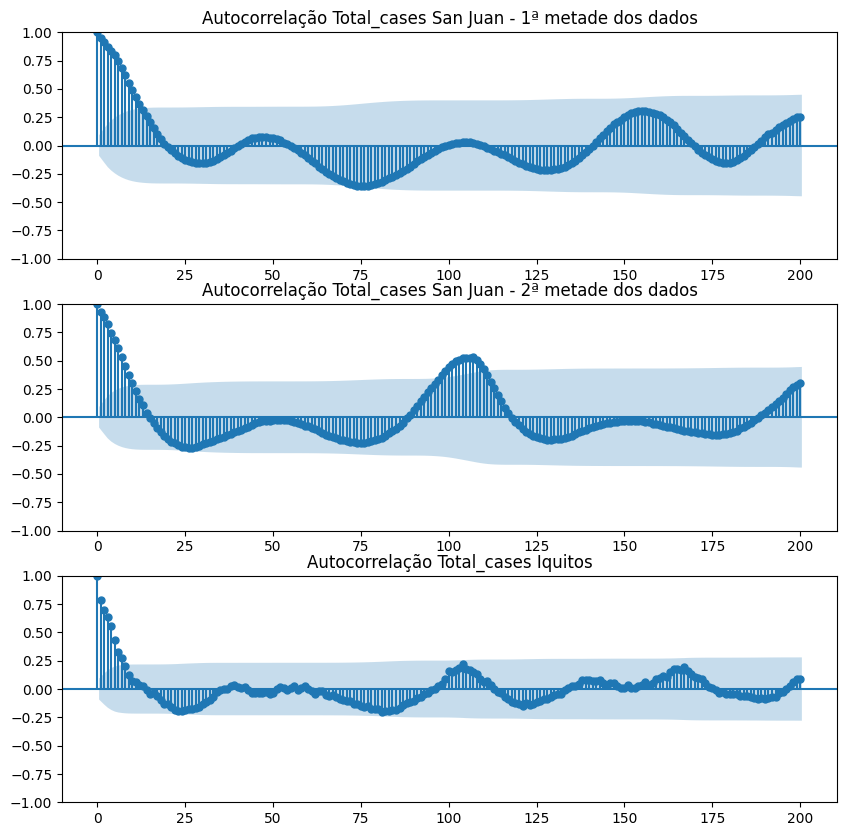

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

max_lags=200
fig,ax = plt.subplots(3,1, figsize=(10,10))

plot_acf(sj_label_cut.iloc[0:468], lags=max_lags, ax=ax[0])
ax[0].set_title('Autocorrelação Total_cases San Juan - 1ª metade dos dados')
plot_acf(sj_label_cut.iloc[468:], lags=max_lags, ax=ax[1])
ax[1].set_title('Autocorrelação Total_cases San Juan - 2ª metade dos dados')
plot_acf(iq_label_cut, lags=max_lags, ax=ax[2])
ax[2].set_title('Autocorrelação Total_cases Iquitos')

plt.show()

Observa-se que na primeira metade do período de registro dos dados de San Juan, existe uma correlação entre períodos de cerca de 48 e 160 semanas (aproximadamente 1 ano e 3 anos, respectivamente). Já na segunda metade (após final do ano 1999), muda-se o padrão, acentuando-se a correlação no período de 110 semanas (aproximadamente 2 anos).

Da mesma forma, observa-se em Iquitos uma correlação no período de aproximadamente 110 semanas (~2 anos).

Agora, analisando a correlação da variável alvo com picos limitados e as variáveis da base de treinamento:

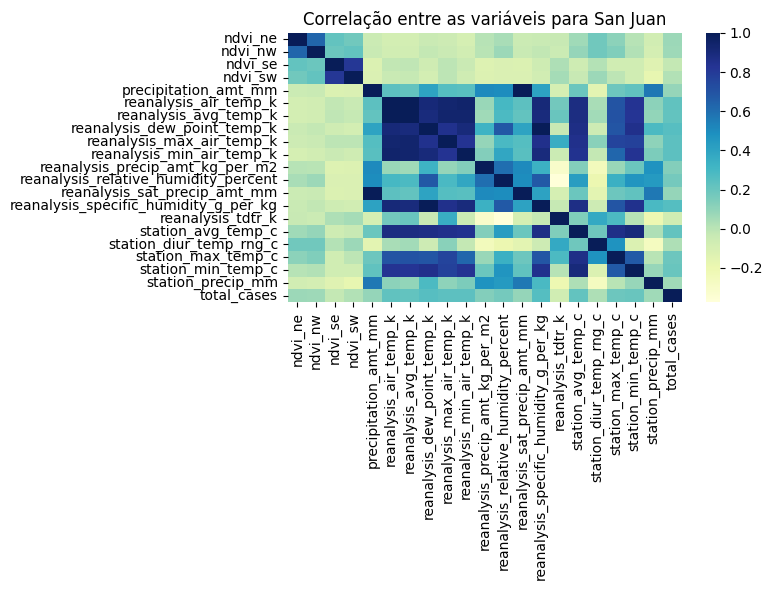

Correlação entre as variáveis e a variável alvo - Total Cases:


reanalysis_tdtr_k                       -0.073414
ndvi_se                                 -0.023677
ndvi_sw                                  0.019709
station_diur_temp_rng_c                  0.029450
station_precip_mm                        0.061474
ndvi_nw                                  0.070266
ndvi_ne                                  0.074960
precipitation_amt_mm                     0.089100
reanalysis_sat_precip_amt_mm             0.089100
reanalysis_precip_amt_kg_per_m2          0.132999
reanalysis_relative_humidity_percent     0.171128
station_max_temp_c                       0.191985
station_min_temp_c                       0.202771
station_avg_temp_c                       0.218168
reanalysis_avg_temp_k                    0.218556
reanalysis_air_temp_k                    0.225591
reanalysis_max_air_temp_k                0.232844
reanalysis_min_air_temp_k                0.232996
reanalysis_dew_point_temp_k              0.249523
reanalysis_specific_humidity_g_per_kg    0.255613


In [12]:
#remove as linhas cortadas de iquitos agora no training set
iq_train_treated.drop(iq_train_treated[0:72].index, inplace=True)

sj_train_data = sj_train_treated.join(sj_label_cut).drop('week_start_date', axis=1)
iq_train_data = iq_train_treated.join(iq_label_cut).drop('week_start_date', axis=1)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(sj_train_data.corr(),ax=ax, cmap='YlGnBu')
ax.set_title('Correlação entre as variáveis para San Juan')
fig.tight_layout()
plt.show()
print('Correlação entre as variáveis e a variável alvo - Total Cases:')
sj_train_data.corr()['total_cases'].sort_values(ascending=True)

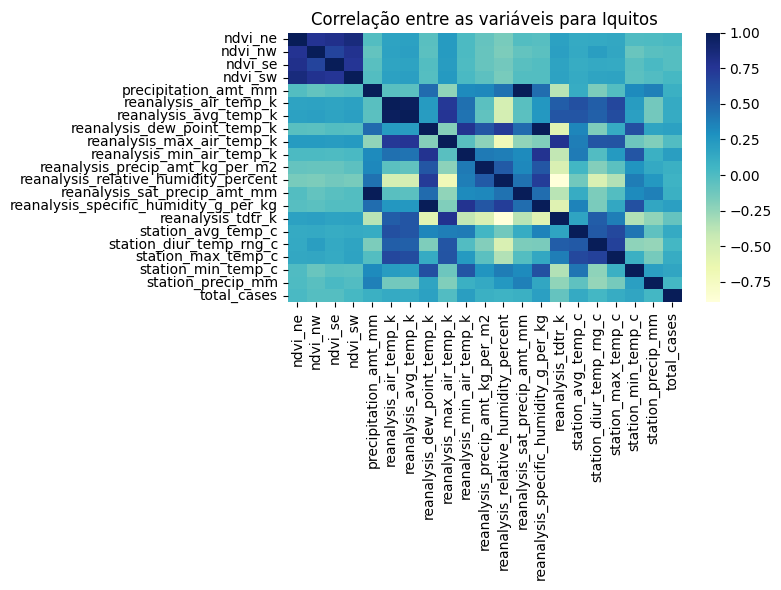

Correlação entre as variáveis e a variável alvo - Total Cases:


reanalysis_tdtr_k                       -0.083300
ndvi_se                                 -0.027909
ndvi_nw                                 -0.024266
reanalysis_max_air_temp_k               -0.013326
ndvi_ne                                  0.016634
ndvi_sw                                  0.031939
station_precip_mm                        0.041205
station_diur_temp_rng_c                  0.044284
reanalysis_relative_humidity_percent     0.075030
reanalysis_precip_amt_kg_per_m2          0.090413
reanalysis_sat_precip_amt_mm             0.092401
precipitation_amt_mm                     0.092401
station_max_temp_c                       0.114238
reanalysis_avg_temp_k                    0.122327
station_avg_temp_c                       0.128103
reanalysis_air_temp_k                    0.133778
station_min_temp_c                       0.159415
reanalysis_dew_point_temp_k              0.191229
reanalysis_specific_humidity_g_per_kg    0.197506
reanalysis_min_air_temp_k                0.203842


In [13]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(iq_train_data.corr(),ax=ax, cmap='YlGnBu')
ax.set_title('Correlação entre as variáveis para Iquitos')
fig.tight_layout()
plt.show()
print('Correlação entre as variáveis e a variável alvo - Total Cases:')
iq_train_data.corr()['total_cases'].sort_values(ascending=True)

Embora as variáveis sejam pouco correlacionadas com a variável alvo, é possível fazer algumas observações:
<ul>
    <li>As variáveis de índice de vegetação são muito correlacionadas entre si para Iquitos. O que indica uma distribuição uniforme de vegetação ao longo dos quatro quadrantes (nordeste, noroeste, sudeste, sudoeste). Para San Juan existe uma diferença considerando os quadrantes localizados no norte com os localizados no sul. Os do norte são bem correlacionados entre si, da mesma forma que os do sul também o são, mas entre essas duas regiões (norte e sul) existe uma baixa correlação. Mostrando que a vegetação não está distribuída de forma uniforme entre norte e sul.</li>
    <li>Duas variáveis de preciptação apresentam mesma correlação com a variável alvo, o que indica que elas são iguais: <font color='blue'>reanalysis_sat_precip_amt_mm</font> e <font color='blue'>precipitation_amt_mm</font>. Observa-se que elas possuem correlação alta entre si (aparentemente igual a 1).</li>
    <li>É curioso verificar que as variáveis de temperatura correspondentes entre si, por exemplo, temperatura média, em Celsius e Kelvin (<font color='blue'>station_avg_temp_c, reanalysis_avg_temp_k</font>), possuem correlações diferentes com variável alvo.</li>
</ul>

<h3>Pré-processamento</h3>

Com base nas análises realizadas, o pré-processamento da base de dados de treinamento vai incluir as etapas de:
<ul>
    <li>Exclusão das variáveis duplicadas.</li>
    <li>Tratamento dos dados ausentes, com interpolação linear.</li>
    <li>Corte dos picos de surto muito discrepantes nas variáveis alvo.</li>
</ul>

In [14]:
def preprocessing_function(data):
    """data: DataFrame dos dados de treinamento """
    sj_data = data.loc['sj'].copy()
    iq_data = data.loc['iq'].copy()
    #variáveis a serem excluídas
    drop_vals = ['reanalysis_sat_precip_amt_mm']
    sj_data.drop(columns=drop_vals, inplace=True)
    iq_data.drop(columns=drop_vals, inplace=True)
    #tratamento de valores ausentes
    sj_data = interpolate(sj_data)
    iq_data = interpolate(iq_data)
    return sj_data, iq_data

<h3> Criação do Modelo</h3>

Apesar do Benchmark do DrivenData utilizar um modelo linear generalizado com família de distribuição binominal negativa (https://drivendata.co/blog/dengue-benchmark/), após as análises realizadas nesse notebook pode-se verificar que o modelo de família de distribuição de Poisson também pode ser aplicado. Neste notebook serão feitos testes envolvendo esse modelo.

<h4>Modelo Linear Generalizado - Poisson</h4>

Os modelos lineares generalizados permitem a estimação de funções de família exponencial uniparamétrica (como a função distribuição de probabilidade de Poisson) atravésde um modelo linear que usa uma função de ligação, neste caso, logarítmica, entre as variáveis explanatórias e a variável de resposta (ou variável alvo).

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

#função para encontrar o modelo de Poisson para os dados
def get_model(train_data, test_data):
    """train_data: DataFrame com dados de treinamento + variável alvo*
    test_data: DataFrame com dados de teste + variável alvo*
    *realizar um join antes de passar os DataFrames para essa função"""
    cols = train_data.columns.values
    #cria a formula do modelo
    model_formula = 'total_cases ~ 1'
    #coloca na formula todas as colunas exceto a primeira que é o week_start_date e a último que é o label
    for i in range(1,len(cols)-1):
        model_formula += ' + ' + cols[i]

    fam = sm.families.Poisson()
    #cria o glm
    model = smf.glm(formula=model_formula,
                    data=train_data, family=fam)

    fitted_model = model.fit()
    predictions = fitted_model.predict(test_data).astype(int)
    score = eval_measures.meanabs(predictions, test_data.total_cases)
    return fitted_model

In [16]:
#Separando o conjunto de treinamento do conjunto de validação
#percentual de dados para validação: 20%
perc_val = PERC_VALID
def train_test_split_data(data, percent):
    """data = DataFrame que será dividido
    percent = percentual de dados no conjunto de validação"""
    ind = round((1-percent)*data.shape[0])
    data_train = data.iloc[:ind]
    data_valid = data.iloc[ind:]
    return data_train, data_valid

#faz o preprocessamento dos dados
sj_data, iq_data = preprocessing_function(train_set)

#indice de drop dos dados iniciais de Iquitos
iq_drop_index = 72
#preprocessa os labels (limita os valores de pico)
sj_label_cut, iq_label_cut = process_label_data(label_set, 160,40,iq_drop_index)
#remove os dados iniciais de Iquitos
iq_data.drop(iq_data[0:iq_drop_index].index, inplace=True)

#faz o join com os labels já tratados
sj_data = sj_data.join(sj_label_cut)
iq_data = iq_data.join(iq_label_cut)

#faz o split do conjunto
sj_data_train, sj_data_valid = train_test_split_data(sj_data, perc_val)
iq_data_train, iq_data_valid = train_test_split_data(iq_data, perc_val)

sj_model = get_model(sj_data_train, sj_data_valid)
iq_model = get_model(iq_data_train, iq_data_valid)

In [17]:
sj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  655
Model:                            GLM   Df Residuals:                      635
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9927.1
Date:                Thu, 04 Jan 2024   Deviance:                       16646.
Time:                        21:09:30   Pearson chi2:                 1.98e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9885
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -59.9457     29.511     -2.031      0.042    -117.787      -2.105
ndvi_ne                                   1.0508      0.096     10.903      0.000       0.862       1.240
ndvi_nw                                  -1.3909      0.111    -12.564      0.000      -1.608      -1.174
ndvi_se                                  -4.8431      0.217    -22.316      0.000      -5.268      -4.418
ndvi_sw                                   4.2645      0.213     20.055      0.000       3.848       4.681
precipitation_amt_mm                     -0.0021      0.000    -10.107      0.000      -0.003      -0.002
reanalysis_air_temp_k                     1.5653      0.369      4.239      0.000       0.842       2.289
reanalysis_avg_temp_k                    -0.1194      0.095     -1.254      0.210      -0.306       0.067
reanalysis_dew_point_temp_k              -1.7969      0.339     -5.300      0.000      -2.461      -1.132
reanalysis_max_air_temp_k                 0.4165      0.020     20.673      0.000       0.377       0.456
reanalysis_min_air_temp_k                 0.0421      0.023      1.858      0.063      -0.002       0.087
reanalysis_precip_amt_kg_per_m2           0.0016      0.000      7.709      0.000       0.001       0.002
reanalysis_relative_humidity_percent      0.3250      0.076      4.286      0.000       0.176       0.474
reanalysis_specific_humidity_g_per_kg     0.3143      0.096      3.267      0.001       0.126       0.503
reanalysis_tdtr_k                        -0.4424      0.024    -18.291      0.000      -0.490      -0.395
station_avg_temp_c                       -0.3544      0.022    -15.858      0.000      -0.398      -0.311
station_diur_temp_rng_c                   0.1216      0.014      8.603      0.000       0.094       0.149
station_max_temp_c                        0.0068      0.011      0.608      0.543      -0.015       0.029
station_min_temp_c                        0.1000      0.014      7.169      0.000       0.073       0.127
station_precip_mm                        -0.0004      0.000     -1.360      0.174      -0.001       0.000
=========================================================================================================
"""

In [18]:
iq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  314
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.3
Date:                Thu, 04 Jan 2024   Deviance:                       1781.7
Time:                        21:09:30   Pearson chi2:                 1.96e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4841
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               275.8655     84.587      3.261      0.001     110.078     441.653
ndvi_ne                                   0.3029      0.581      0.521      0.602      -0.836       1.442
ndvi_nw                                  -1.4479      0.476     -3.040      0.002      -2.381      -0.514
ndvi_se                                  -0.4090      0.461     -0.888      0.375      -1.312       0.494
ndvi_sw                                   0.6426      0.513      1.252      0.211      -0.364       1.649
precipitation_amt_mm                     -0.0036      0.001     -4.886      0.000      -0.005      -0.002
reanalysis_air_temp_k                     0.3884      0.239      1.627      0.104      -0.079       0.856
reanalysis_avg_temp_k                    -0.1373      0.094     -1.467      0.142      -0.321       0.046
reanalysis_dew_point_temp_k              -1.2857      0.328     -3.923      0.000      -1.928      -0.643
reanalysis_max_air_temp_k                -0.0394      0.021     -1.920      0.055      -0.080       0.001
reanalysis_min_air_temp_k                 0.0556      0.031      1.771      0.077      -0.006       0.117
reanalysis_precip_amt_kg_per_m2          -0.0027      0.001     -4.303      0.000      -0.004      -0.001
reanalysis_relative_humidity_percent      0.0628      0.051      1.234      0.217      -0.037       0.162
reanalysis_specific_humidity_g_per_kg     1.1628      0.281      4.137      0.000       0.612       1.714
reanalysis_tdtr_k                         0.0296      0.035      0.850      0.395      -0.039       0.098
station_avg_temp_c                       -0.0105      0.044     -0.239      0.811      -0.097       0.076
station_diur_temp_rng_c                   0.0519      0.025      2.041      0.041       0.002       0.102
station_max_temp_c                        0.0229      0.026      0.888      0.374      -0.028       0.074
station_min_temp_c                        0.0486      0.029      1.695      0.090      -0.008       0.105
station_precip_mm                         0.0006      0.000      1.878      0.060   -2.56e-05       0.001
=========================================================================================================
"""

O resultado com este modelo é equivalente ao encontrado no benchmark do problema (https://drivendata.co/blog/dengue-benchmark/), ou seja, não satisfatório. Apesar disso, algumas observações interessantes podem ser feitas.
Primeiramente o fato de que o modelo de Poisson e o modelo Binomial Negativo tiveram resultados semelhantes, sendo que o modelo de Poisson foi possível de ser utilizado ao se estabelecer um limite para os picos dos surtos de dengue em ambas as cidades. Trazendo o valor do desvio padrão da variável alvo <font color='blue'>total_cases</font> para próximo da sua média.

Outro ponto interessante de se observar está relacionado ao pvalue dos coeficientes de cada variável utilizada na regressão. Para o modelo de Iquitos, muitas variáveis apresentaram um pvalue com uma casa decimal (embora não esteja estabelecido a priori qual o nível de significância utilizado), que indica que não é possível afirmar que os coeficientes destas variáveis na regressão quantificam bem a relação delas através da função de ligação com a variável alvo.

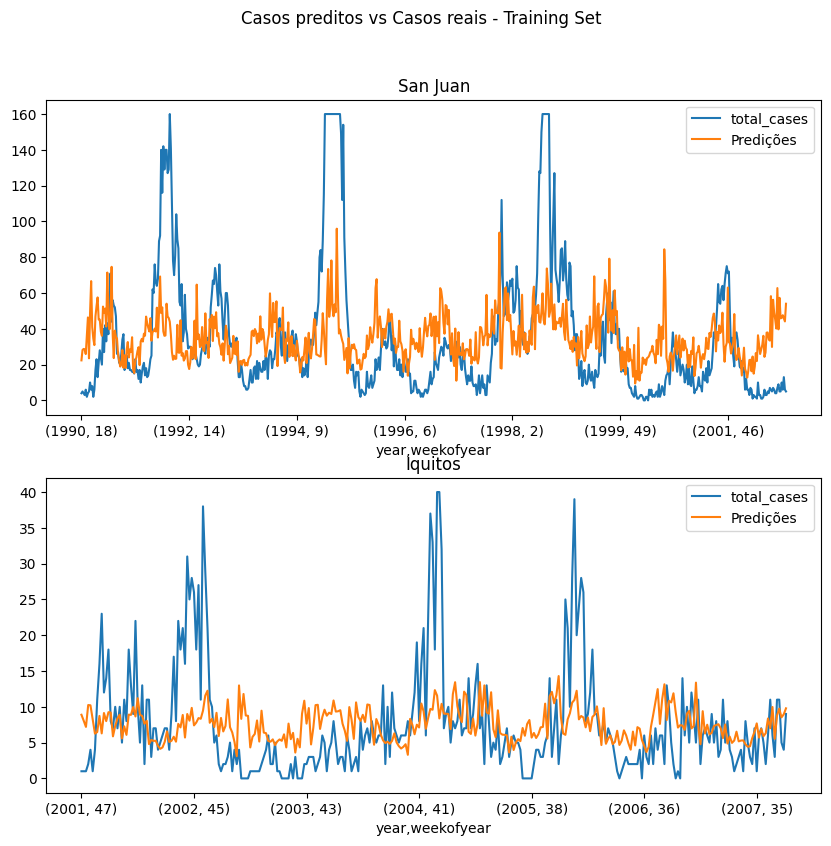

In [19]:
def plot_predictions(sj_label, iq_label, sj_preds, iq_preds):
    """sj_label = data frame com total_cases para San Juan
    iq_label = data frame com total_cases para Iquitos
    sj_preds = predições de San Juan
    ip_preds = predições de Iquitos"""
    figs, axs = plt.subplots(2,1, figsize=(10,9))
    sj_label.plot(ax=axs[0])
    axs[0].plot(sj_preds, label="Predições")
    axs[0].legend()
    axs[0].set_title('San Juan')

    iq_label.plot(ax=axs[1])
    axs[1].plot(iq_preds, label="Predições")
    axs[1].legend()
    axs[1].set_title('Iquitos')

    plt.suptitle("Casos preditos vs Casos reais - Training Set")
    plt.show()
    return None

plot_predictions(sj_data_train['total_cases'], iq_data_train['total_cases'], 
                 sj_model.fittedvalues.values,iq_model.fittedvalues.values)

In [20]:
from sklearn.metrics import mean_absolute_error

def print_MAE(sj_data_valid, iq_data_valid, sj_model, iq_model, sj_label=None, iq_label=None):
    """sj_data_valid = Dados de validação para San Juan
    iq_data_valid = Dados de validação para Iquitos
    sj_model = modelo para San Juan
    iq_model = modelo para Iquitos
    sj_label = Labels do conjunto de validação para San Juan
    iq_label = Labels do conjunto de validação para Iquitos"""
    if sj_label is None:
        sj_label = sj_data_valid['total_cases']
    if iq_label is None:
        iq_label = iq_data_valid['total_cases']    
    #avaliando o modelo com o conjunto de validação
    sj_valid_preds = np.round(sj_model.predict(sj_data_valid)).astype(int)
    iq_valid_preds = np.round(iq_model.predict(iq_data_valid)).astype(int)
    print('Erro Médio Absoluto com conjunto de validação: ',mean_absolute_error(sj_label, sj_valid_preds))
    print('Erro Médio Absoluto com conjunto de validação: ',mean_absolute_error(iq_label, iq_valid_preds))

    full_valid_data = list(sj_label.values)+list(iq_label.values)
    full_valid_preds = list(sj_valid_preds)+list(iq_valid_preds)
    print('Erro Médio Absoluto Total: ',mean_absolute_error(full_valid_data, full_valid_preds))
    return None

print_MAE(sj_data_valid, iq_data_valid, sj_model, iq_model)

Erro Médio Absoluto com conjunto de validação:  26.441281138790035
Erro Médio Absoluto com conjunto de validação:  7.940298507462686
Erro Médio Absoluto Total:  20.467469879518074


O modelo é muito eficiente em modelar a sazonalidade dos dados, embora exista um pequeno defasamento entre a previsão e o dado real. Esse defasamento se deve à dinâmica de contágio da doença e o ciclo de vida do mosquito transmissor. Os efeitos do clima e da temperatura no contágio da dengue são observados semanas depois. Outro ponto é que o modelo não é capaz de modelar os picos de surto. Isso porque a dinâmica de surto ocorre principalmente pela característica autoregressiva da variável alvo. O número de casos da doença é autocorrelacionado no tempo, uma vez que quanto mais pessoas doentes, maiores as chances do mosquito transmissor carregar o vírus de uma pessoa para a outra (o mosquito é o vetor), e em consequência mais casos da doenças serão registrados.

Serão realizados dois testes para tentar melhorar a performance do modelo:
<ul>
    <li>Defasar as variáveis explanatórias da varíavel alvo por intervalos de tempo fixos e verificar qual defasamento traz melhor resultado para cada cidade.</li>
    <li> Para a cidade de San Juan, será feito um teste treinando o modelo apenas com os dados a partir do ano 2000, pois sabe-se que existe uma mudança na sazonalidade a partir desse ano.</li>
</ul>

In [21]:
def shift_dataset(data, shift, col='total_cases'):
    """data = DataFrame com as variáveis explanatórias + variável alvo
    shift = número de posições que serão deslocadas as linhas do DataFrame
    col = coluna que será deslocada"""
    shifted_data = data.copy()
    #o defasamento será realizado apenas na variável alvo, sempre trazendo ela pra trás 
    #uma vez que o clima atual afeta a variável alvo no futuro
    shifted_data[col] = data[col].shift(shift, axis=0)
    #como está trazendo a variável alvo pra trás, as ultimas semanas ficarão sem label
    #então elas serão dropadas
    shifted_data.dropna(axis=0, inplace=True)
    return shifted_data

def get_best_shifted_model(data, col='total_cases', sentido=-1, perc_val=PERC_VALID):
    """data: DataFrame com variáveis explanatórias + variável alvo*
    col=coluna do DataFrame que será deslocada para encontrar o melhor modelo
    sentido= sentido do deslocamento, -1 é pra trás e 1 para frente
    *realizar um join antes de passar os DataFrames para essa função"""
    #o split de dados de treinamento e validação será feito aqui dentro
    grid_shift = range(1,20)
    best_shift = []
    best_score = 1000
    for shift in grid_shift:
        shift= sentido*shift
        shifted_data = shift_dataset(data, shift, col)
        shifted_train, shifted_test = train_test_split_data(shifted_data, perc_val)
        #print('Shift = ', shift)
        model = get_model(shifted_train, shifted_test)
        predictions = np.round(model.predict(shifted_test).astype(int))
        #predictions = model.fittedvalues.values.astype(int)
        score = eval_measures.meanabs(predictions, shifted_test.total_cases)
        #print('Score Total: ', score)
        if score < best_score:
            best_shift = shift
            best_score = score
            best_model = model
        
    print('Best Shift = ', best_shift)
    print('Best Score = ', best_score)
    return (best_model, best_shift)

print('SJ Model')
(sj_best_model, sj_shift) = get_best_shifted_model(sj_data)
print('IQ Model')
(iq_best_model, iq_shift) = get_best_shifted_model(iq_data)

SJ Model
Best Shift =  -16
Best Score =  20.981884057971016
IQ Model
Best Shift =  -16
Best Score =  7.269230769230769


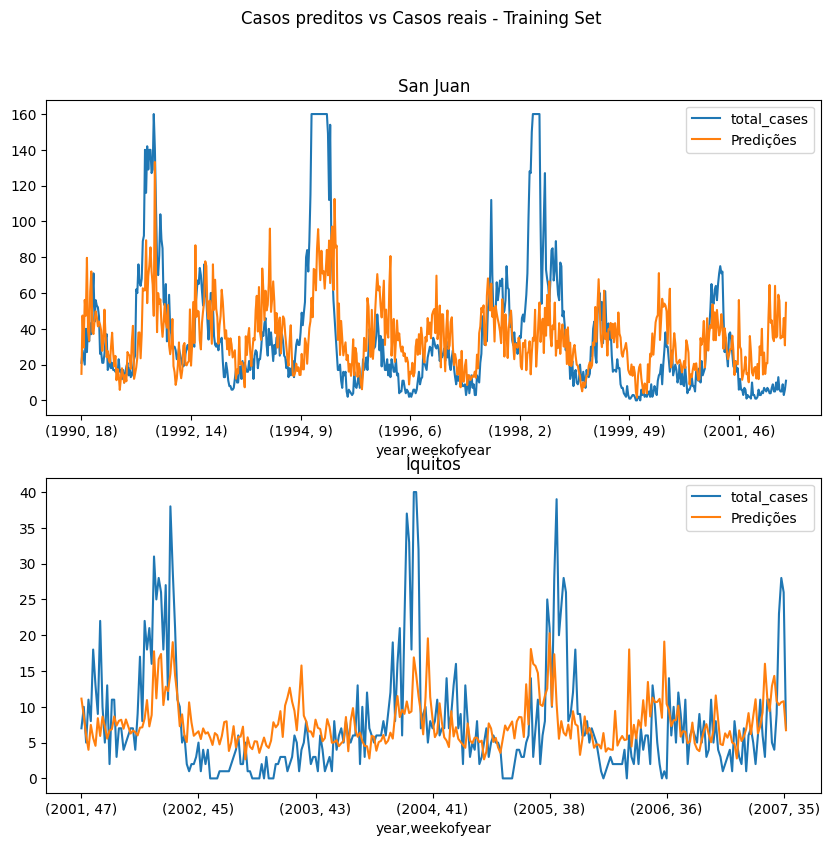

Erro Médio Absoluto com conjunto de validação:  21.329710144927535
Erro Médio Absoluto com conjunto de validação:  7.2846153846153845
Erro Médio Absoluto Total:  16.832512315270936


In [22]:
sj_shifted_data = shift_dataset(sj_data, sj_shift)
iq_shifted_data = shift_dataset(iq_data, iq_shift)

shifted_sj_train, shifted_sj_test = train_test_split_data(sj_shifted_data, perc_val)
shifted_iq_train, shifted_iq_test = train_test_split_data(iq_shifted_data, perc_val)


plot_predictions(shifted_sj_train['total_cases'], shifted_iq_train['total_cases'], 
                 sj_best_model.fittedvalues.values,iq_best_model.fittedvalues.values)

print_MAE(shifted_sj_test, shifted_iq_test, sj_best_model, iq_best_model)

Observa-se que aplicando o defasamento das variáveis explanatórias em relação à variável alvo, o modelo foi capaz de se ajustar melhor não só à sazonalidade, como também foi mais eficiente em modelar os picos dos períodos de surto para ambas as cidades.

In [23]:
#separando o período de coleta para San Juan após 2000 (metade do dataframe pra frente)
sj_data_p2000 = sj_data.iloc[468:]

print('SJ Model')
(sj_best_modelp2000, sj_shift_tp2000) = get_best_shifted_model(sj_data_p2000)

SJ Model
Best Shift =  -17
Best Score =  14.822222222222223


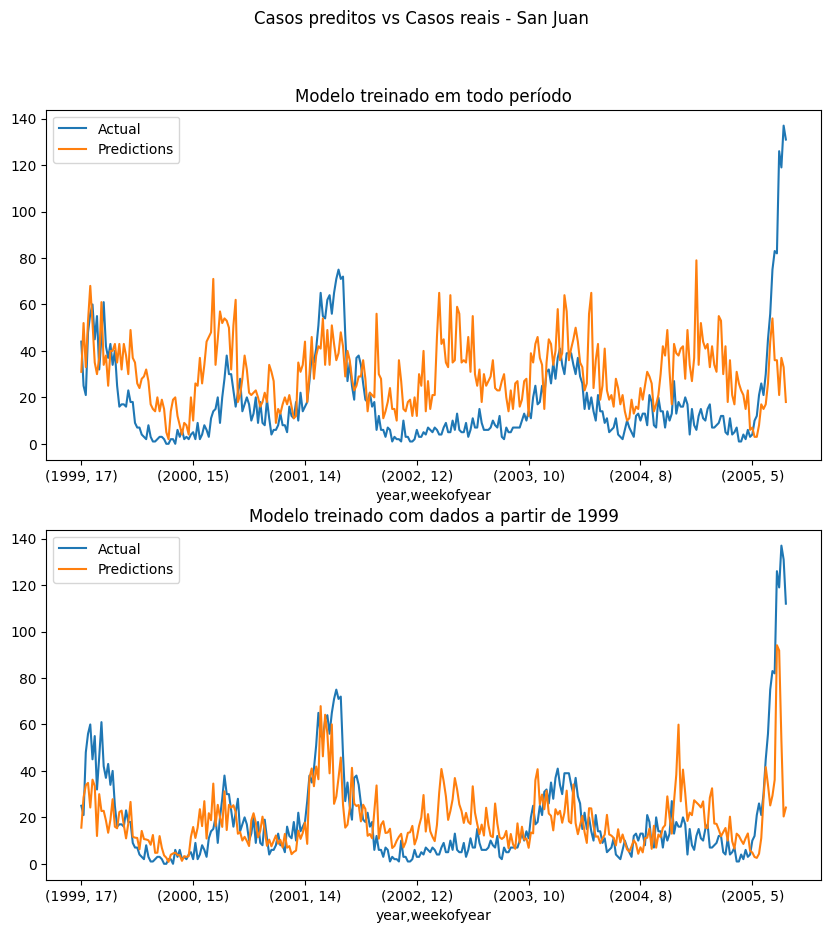

In [24]:
shifted_sj_tp2000 = shift_dataset(sj_data_p2000, sj_shift_tp2000)
shifted_sj_tp = shift_dataset(sj_data_p2000, sj_shift)
shifted_sj_train_p2000, shifted_sj_test_p2000 = train_test_split_data(shifted_sj_tp2000, PERC_VALID)
shifted_sj_train2, shifted_sj_test2 = train_test_split_data(shifted_sj_tp, PERC_VALID)

figs, axs = plt.subplots(2,1, figsize=(10,10))

shifted_sj_train2['total_cases'].plot(ax=axs[0], label="Actual")
axs[0].plot(list(np.round(sj_best_model.predict(exog=shifted_sj_train_p2000)).astype(int)), label="Predictions")
axs[0].legend()
axs[0].set_title('Modelo treinado em todo período')

shifted_sj_train_p2000['total_cases'].plot(ax=axs[1], label="Actual")
axs[1].plot(list(sj_best_modelp2000.fittedvalues), label="Predictions")
axs[1].legend()
axs[1].set_title('Modelo treinado com dados a partir de 1999')

plt.suptitle("Casos preditos vs Casos reais - San Juan")
plt.show()

In [25]:
sj_valid_data = shifted_sj_test_p2000
iq_valid_data = shifted_iq_test

print_MAE(sj_valid_data, iq_valid_data, sj_best_modelp2000, iq_best_model)

Erro Médio Absoluto com conjunto de validação:  14.955555555555556
Erro Médio Absoluto com conjunto de validação:  7.2846153846153845
Erro Médio Absoluto Total:  11.19245283018868


Observa-se que o modelo treinado apenas com os dados de San Juan após a semana 17 do ano de 1999 conseguiu se ajustar melhor aos dados desse período, sem a influência dos dados dos anos anteriores. Foi capaz de modelar melhor o penúltimo pico de surto, porém perdeu a sensibilidade para o último pico registrado.

Ainda assim, o modelo está com uma sazonalidade predominante de 1 ano. No geral, nas análises de séries temporais, os padrões e informações mais recentes podem exercem maior influência nos valores presentes do que padrões e informações mais antigas, e isso se aplica à dinâmica deste problema.

Para tentar encontrar uma função que melhor se ajusta ao número de casos, optou-se por utilizar apenas os dados a partir do final de 2002 para San Juan, onde se percebe uma sazonalidade mais marcada num período de 2 anos.

SJ Model
Best Shift =  -18
Best Score =  15.933333333333334


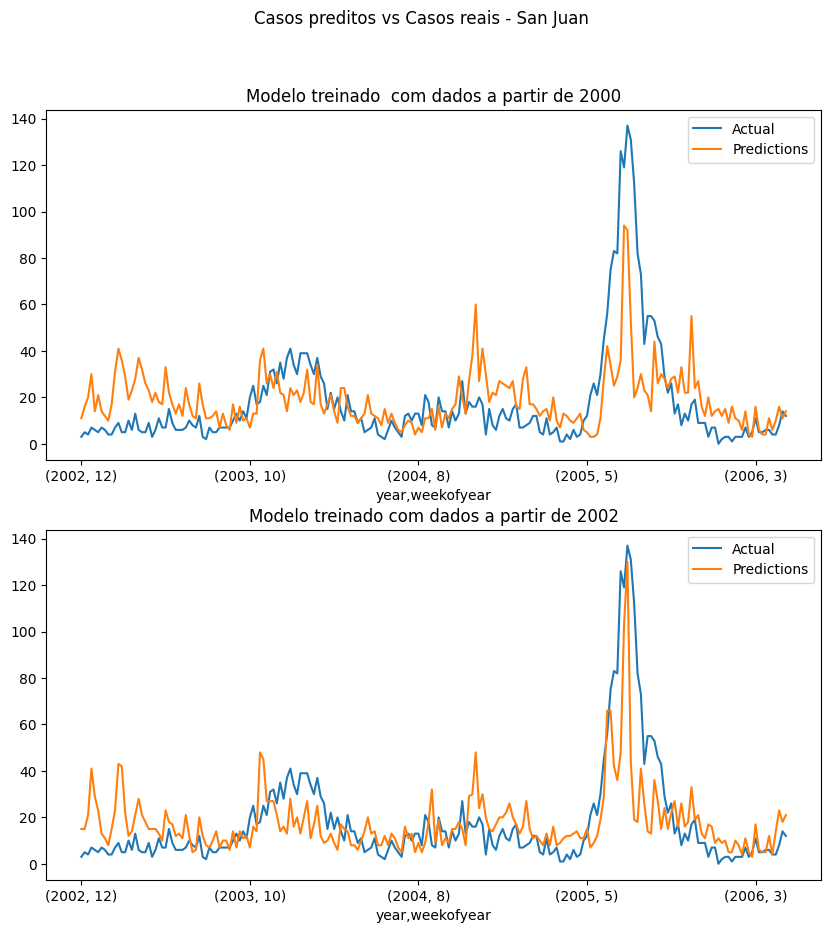

Erro Médio Absoluto com conjunto de validação:  15.922222222222222
Erro Médio Absoluto com conjunto de validação:  7.2846153846153845
Erro Médio Absoluto Total:  10.818181818181818


In [26]:
#separando o período de coleta para San Juan após 2002 
sj_data_p2002 = sj_data.iloc[618:]

print('SJ Model')
(sj_best_modelp2002, sj_shiftp2002) = get_best_shifted_model(sj_data_p2002)

shifted_sj_tp2002 = shift_dataset(sj_data_p2002, sj_shiftp2002)
shifted_sj_train_p2002, shifted_sj_test_p2002 = train_test_split_data(shifted_sj_tp2002, PERC_VALID)

figs, axs = plt.subplots(2,1, figsize=(10,10))
shifted_sj_train_p2002['total_cases'].plot(ax=axs[0], label="Actual")
axs[0].plot(list(np.round(sj_best_modelp2000.predict(exog=shifted_sj_train_p2002)).astype(int)), label="Predictions")
axs[0].legend()
axs[0].set_title('Modelo treinado  com dados a partir de 2000')

shifted_sj_train_p2002['total_cases'].plot(ax=axs[1], label="Actual")
axs[1].plot(list(np.round(sj_best_modelp2002.predict(exog=shifted_sj_train_p2002)).astype(int)), label="Predictions")
axs[1].legend()
axs[1].set_title('Modelo treinado com dados a partir de 2002')

plt.suptitle("Casos preditos vs Casos reais - San Juan")
plt.show()

sj_valid_data = shifted_sj_test_p2002
iq_valid_data = shifted_iq_test

print_MAE(sj_valid_data, iq_valid_data, sj_best_modelp2002, iq_best_model)

<h3> Submissão dos Dados de Teste</h3>

Para gerar as predições nos dados de teste será necessário ajustar o conjunto de dados considerando o deslocamento no tempo aplicado para cada cidade. Os dados de teste são subsequentes aos dados de treinamento (no tempo).

Para San Juan, o deslocamento no tempo que resultou no melhor modelo foi de 18 semanas, considerando o modelo gerado pelos dados a partir do final do ano de 2002.

Para Iquitos, o deslocamento no tempo que gerou o melhor modelo foi de 16 semanas.

Então, é necessário realizar as previsões a serem submetidas a partir dos dados das últimas 5 e 19 semanas do conjunto de treinamento para San Juan e Iquitos respectivamente.

In [27]:
sj_test, iq_test = preprocessing_function(test_set)
#concatena as ultimas semanas de cada conjunto de treinamento ao conjunto de test
sj_test_data = pd.concat([sj_train_data.iloc[sj_shiftp2002:],sj_test.iloc[:sj_shiftp2002]],axis=0)
iq_test_data = pd.concat([iq_train_data.iloc[iq_shift:],iq_test.iloc[:iq_shift]],axis=0)
#insere a coluna total_cases para não gerar erro ao usar o modelo
sj_test_data['total_cases'] = np.zeros(len(sj_test_data))
iq_test_data['total_cases'] = np.zeros(len(iq_test_data))

sj_predictions = np.round(sj_best_modelp2002.predict(exog=sj_test_data)).astype(int)
iq_predictions = np.round(iq_best_model.predict(exog=iq_test_data)).astype(int)

submission_format_file = os.path.join(data_path,'submission_format.csv')
submission = pd.read_csv(submission_format_file,index_col=[0, 1, 2])

submission['total_cases'] = np.concatenate([sj_predictions, iq_predictions])
submission_file = os.path.join(data_path,'submission1.csv')
submission.to_csv(submission_file)
print('Submission file 1 created!')

Submission file 1 created!


<h3> Regressor de Poisson - Scikit-Learn</h3>

A biblioteca Scikit-Learn também implementa um modelo linear generalizado para a família de funções de distribuição de Poisson. 

Será criado um pipeline com as funções de pré-processamento e com o modelo PoissonRegressor. O pipeline considera que os dataframes de SanJuan e Iquitos já estejam previamente separados. No pré-processamento serão incluídas, nessa ordem, as etapas de: exclusão das colunas indesejadas, tratamento de dados ausentes com interpolação de primeira ordem, normalização das variáveis utilizando StandardScaler.

In [28]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

class Interpolate_Data(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    """Classe que irá tratar os dados ausentes, utilizando uma função de interpolação de primeira ordem"""
    def __init__(self):
        None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X1 = self.interpolate(X)
        return X1    
    #função para tratar os dados ausentes
    def interpolate(self, data):
        """data é o dataframe"""
        data1 = data.reset_index(inplace=False, drop=True)
        x = range(1,len(data1)+1)
        for col in data1.select_dtypes(include=[float]).columns:
            #para cada coluna, pega o índice, iniciando do valor 1, e o valor em y associado
            #apenas para linhas onde o valor corresponde é diferente de NaN
            xp = data1[col][data1[col].notna()].index+1
            yp = data1[col][data1[col].notna()].values
            #interpola os valores com todos os índices, completando a série de dados
            y = np.interp(x,xp,yp)
            data1[col] = y
        data1.set_index(data.index, inplace=True)
        return data1
#variáveis a serem excluídas
drop_vals = ['week_start_date','reanalysis_sat_precip_amt_mm']

class Drop_Data(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    """Classe para deletar colunas não desejadas no dataframe, dentro do pipeline"""
    drop_columns = []
    
    def __init__(self, drop_columns):
        self.drop_columns = drop_columns
        None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X1 = X.drop(columns=self.drop_columns, inplace=False)
        return X1  
    
pipeline = Pipeline([('drop_columns', Drop_Data(drop_columns=drop_vals)),
                     ('interpolate', Interpolate_Data()),
                     ('scaling', StandardScaler())])
pipeline

Pipeline(steps=[('drop_columns',
                 Drop_Data(drop_columns=['week_start_date',
                                         'reanalysis_sat_precip_amt_mm'])),
                ('interpolate', Interpolate_Data()),
                ('scaling', StandardScaler())])

In [29]:
perc_val = PERC_VALID
sj_data = train_set.loc['sj'].copy()
iq_data = train_set.loc['iq'].copy()
#indice de drop dos dados iniciais de Iquitos
iq_drop_index = 72
#preprocessa os labels (limita os valores de pico)
sj_label_cut, iq_label_cut = process_label_data(label_set, 160,40,iq_drop_index)
#remove os dados iniciais de Iquitos
iq_data.drop(iq_data[0:iq_drop_index].index, inplace=True)

#separando o período de coleta para San Juan após 2000 (metade do dataframe pra frente)
#sj_data = sj_data.iloc[618:] #468
#sj_label_cut = sj_label_cut[618:]

#faz o split do conjunto
sj_data_train, sj_data_valid = train_test_split_data(sj_data, perc_val)
iq_data_train, iq_data_valid = train_test_split_data(iq_data, perc_val)
sj_label_train, sj_label_valid = train_test_split_data(sj_label_cut, perc_val)
iq_label_train, iq_label_valid = train_test_split_data(iq_label_cut, perc_val)


O PoissonRegressor tem um parâmetro de regularização <font color=blue>alpha</font> que multiplica a penalidade L2, que deve ser maior ou igual a zero. Esse será o hiperparâmetro otimizado. 

Foi observado também que para San Juan, o modelo criado com dados considerando todo o período de coleta não ajustou bem ao conjunto de validação. Em problemas que envolvem séries temporais é comum que dados mais próximos no tempo estejam mais correlacionados ou tenham mais influência entre si. 

Para avaliar esse efeito durante o treinamento do modelo, serão criadas partições (dobras ou folds) do conjunto de treinamento, no caso, 5 partições. O modelo será treinado primeiramente com a partição mais recente, depois com as duas partições mais recentes e assim sucessivamente até incluir todo o conjunto de treinamento, conforme exemplificado na figura abaixo:

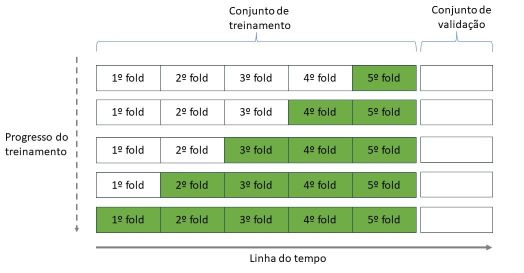

In [30]:
from sklearn.pipeline import make_pipeline

#utiliza n folds para avaliar qual melhor intervalo de dados
#que gera um melhor modelo
n_splits = 5

def get_best_model(data_train, label_train, data_valid, label_valid, n_splits):
    """data_train: DataFrame de treinamento com variáveis explanatórias*
    label_train=DataFrame de treinamento com a variável alvo
    data_valid: DataFrame de validação com variáveis explanatórias*
    label_valid=DataFrame de validação com a variável alvo
    n_splits= numero de folds do dataset de treinamento"""
    fold_elems = np.round(len(data_train)/n_splits).astype(int)
    grid_alpha = np.arange(0.5,5,0.5)
    grid_folds = np.arange(4,-1,-1)
    best_alpha = []
    best_nfold = []
    best_score = 1000

    for alpha in grid_alpha:
        model = make_pipeline(pipeline, PoissonRegressor(alpha=alpha))
        for nfold in grid_folds:
            inf_index = nfold*fold_elems
            model.fit(data_train[inf_index:], label_train[inf_index:].values.ravel())
            predictions = np.round(model.predict(data_valid))
            score = mean_absolute_error(predictions, label_valid)
            #print('Score Total: ', score)
            if score < best_score:
                best_score = score
                best_model = model
                best_alpha = alpha
                best_nfold = nfold    
    print('Best Alpha = ', best_alpha)
    print('Best #Folds = ', best_nfold)
    print('Best Score = ', best_score)
    return (best_model, best_alpha, best_nfold)

print("Parâmetros do melhor modelo para San Juan:")
(poisson_model_sj, best_alpha_sj, best_nfold_sj) = get_best_model(sj_data_train,
                                                                  sj_label_train, sj_data_valid, sj_label_valid, n_splits)
print("Parâmetros do melhor modelo para Iquitos:")
(poisson_model_iq, best_alpha_iq, best_nfold_iq) = get_best_model(iq_data_train,
                                                                  iq_label_train, iq_data_valid, iq_label_valid, n_splits)

Parâmetros do melhor modelo para San Juan:
Best Alpha =  4.5
Best #Folds =  4
Best Score =  15.697508896797153
Parâmetros do melhor modelo para Iquitos:
Best Alpha =  0.5
Best #Folds =  1
Best Score =  7.626865671641791


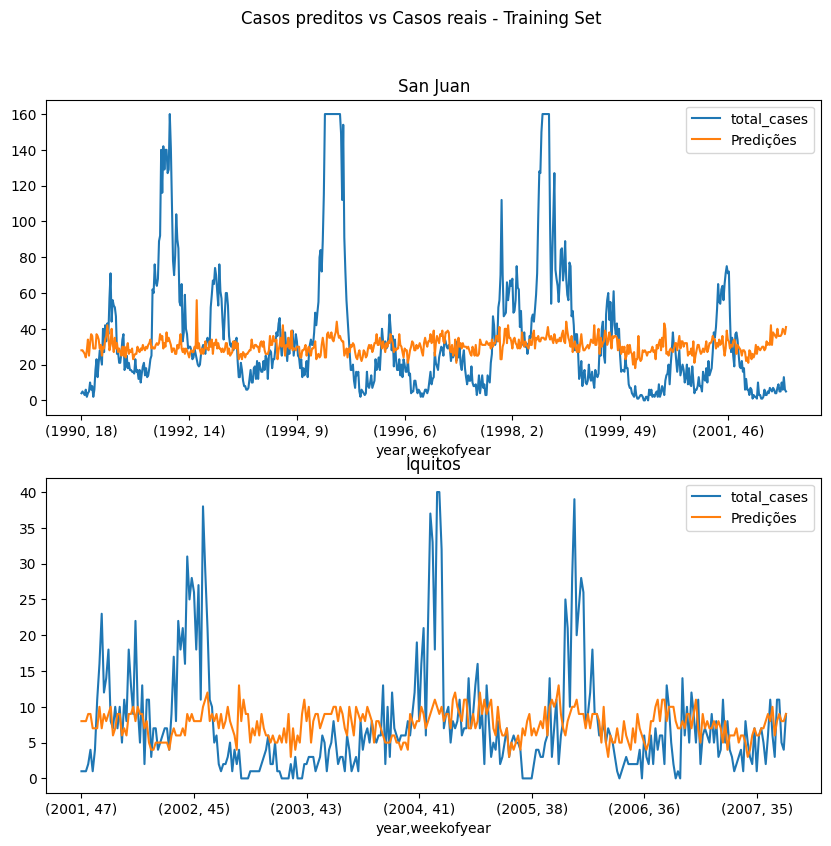

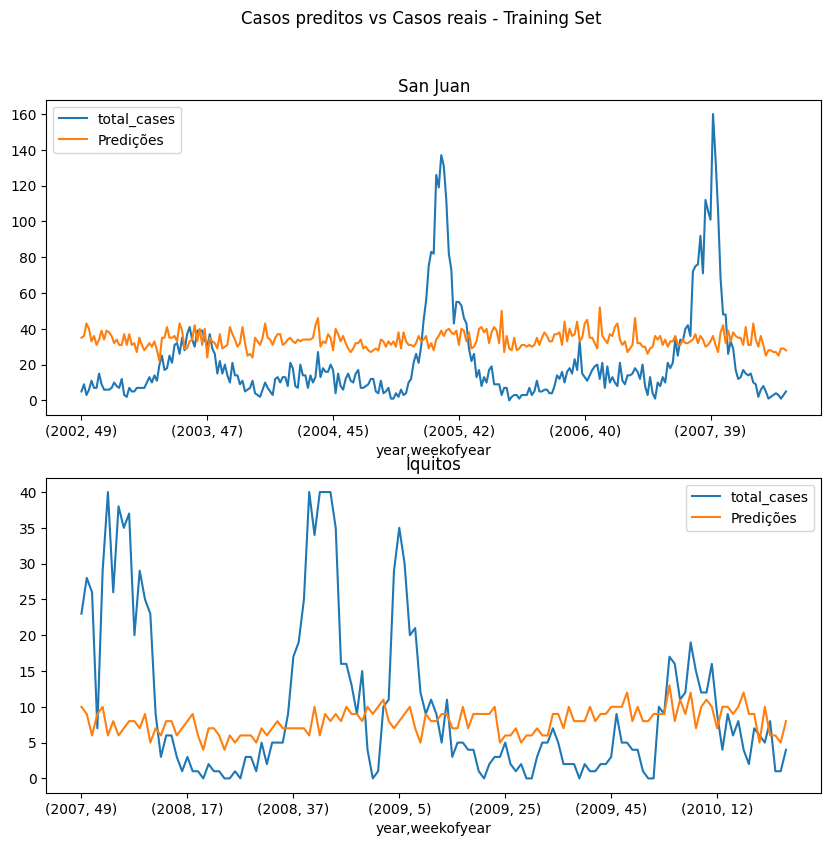

In [31]:
#Insample predictions
sj_preds = np.round(poisson_model_sj.predict(sj_data_train))
iq_preds = np.round(poisson_model_iq.predict(iq_data_train))

plot_predictions(sj_label_train,iq_label_train,sj_preds,iq_preds)

#Predições no conjunto de validação
sj_preds = np.round(poisson_model_sj.predict(sj_data_valid))
iq_preds = np.round(poisson_model_iq.predict(iq_data_valid))
plot_predictions(sj_label_valid,iq_label_valid,sj_preds,iq_preds)

In [32]:
print_MAE(sj_data_valid, iq_data_valid, poisson_model_sj, poisson_model_iq,sj_label_valid,iq_label_valid)

Erro Médio Absoluto com conjunto de validação:  24.02135231316726
Erro Médio Absoluto com conjunto de validação:  7.962686567164179
Erro Médio Absoluto Total:  18.836144578313252


In [33]:
#concatena as ultimas semanas de cada conjunto de treinamento ao conjunto de test
sj_test_data = test_set.loc['sj'].copy()
iq_test_data = test_set.loc['iq'].copy()

sj_predictions = np.round(poisson_model_sj.predict(sj_test_data)).astype(int)
iq_predictions = np.round(poisson_model_iq.predict(iq_test_data)).astype(int)

submission_format_file = os.path.join(data_path,'submission_format.csv')
submission = pd.read_csv(submission_format_file,index_col=[0, 1, 2])

submission['total_cases'] = np.concatenate([sj_predictions, iq_predictions])
submission_file = os.path.join(data_path,'submission2.csv')
submission.to_csv(submission_file)
print('Submission file 2 created!')

Submission file 2 created!


Como já era esperado, o modelo também apresenta uma defasagem com relação aos dados de treinamento.

Será feita uma alteração no pipeline para incluir uma classe que realiza o deslocamento dos dados a partir de um hiperparâmetro customizado <font color=blue>shift</font> que indica quantas vezes deve-se deslocar as linhas da matriz de atributo para frente (pro futuro). Ao deslocar um linha o valor dela se mantem na linha anterior, e a ultima linha da matriz é descartada.

In [34]:
#Esse estimador deve apenas dar um shift nos dados de treinamento durante o fit apenas
#e apenas na hora que o pipeline estiver sendo treinado, ao fazer predições não se deve fazê-lo
#Para isso, utiliza-se um atributo fitted que se inicia com 0.
#Ao executar o método fit ele é incrementado indo pra 1.
#Durante o treinamento é chamado o fit e em seguida o transform. Durante a predição é chamado só o transform.
#Ao chamar o transform após o método fit, o parametro fitted estará igual a 1. 
#Se esse for o caso, incrementa novamente o parametro fitted, indo pra 2.
#Quando transform for chamado novamente durante o predict, fitted estará igual a 2. Nesse caso, 
#o transform não fará nenhuma alteração no dataframe X
class Data_Shifter(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    """Classe que irá fazer o deslocamento dos dados no tempo para melhor ajuste do modelo"""
    shift = 0
    fitted = 0
    def __init__(self, shift):
        self.shift=shift
        self.fitted = 0
        None
        
    def fit(self, X, y=None):
        if self.fitted == 0:
            fill_values = X.iloc[0].values
            X1 = X.shift(periods=self.shift, axis=0)
            for i in range(self.shift):
                X1.iloc[i]=fill_values
            self.X_ = X1
            self.fitted += 1
        return self
    
    def transform(self, X, y=None):
        if self.fitted==1:
            X1 = self.X_
            self.fitted += 1
        else:
            X1=X.copy()    
        return X1

#data_shifter = Data_Shifter(shift=10)


def create_pipeline(shift, alpha, drop_vals=['week_start_date','reanalysis_sat_precip_amt_mm']):
    pipeline = Pipeline([('data_shifter', Data_Shifter(shift=shift)),
                     ('drop_columns', Drop_Data(drop_columns=drop_vals)),
                     ('interpolate', Interpolate_Data()),
                     ('scaling', StandardScaler()),
                     ('poissonregressor',PoissonRegressor(alpha=alpha))])
    return pipeline
create_pipeline(5,0.5)

Pipeline(steps=[('data_shifter', Data_Shifter(shift=5)),
                ('drop_columns',
                 Drop_Data(drop_columns=['week_start_date',
                                         'reanalysis_sat_precip_amt_mm'])),
                ('interpolate', Interpolate_Data()),
                ('scaling', StandardScaler()),
                ('poissonregressor', PoissonRegressor(alpha=0.5))])

In [35]:
def get_best_shifted_model(data_train, label_train, data_valid, label_valid, n_splits):
    """data_train: DataFrame de treinamento com variáveis explanatórias*
    label_train=DataFrame de treinamento com a variável alvo
    data_valid: DataFrame de validação com variáveis explanatórias*
    label_valid=DataFrame de validação com a variável alvo
    n_splits= numero de folds do dataset de treinamento"""
    fold_elems = np.round(len(data_train)/n_splits).astype(int)
    grid_alpha = np.arange(0.5,5,0.5)
    grid_folds = np.arange(4,-1,-1)
    grid_shift = np.arange(0,21,1)
    best_alpha = []
    best_nfold = []
    best_shift = []
    best_score = 1000
    for alpha in grid_alpha:
        for shift in grid_shift:
            for nfold in grid_folds:
                inf_index = nfold*fold_elems
                model = create_pipeline(shift,alpha)
                model.fit(data_train[inf_index:], label_train[inf_index:].values.ravel())
                #para fazer a predição, como não será feito o shift pelo pipeline,
                #deve-se utilizar os dados do passado no dataframe de treinamento
                if shift >0:
                    data_valid_shift = pd.concat([data_train.iloc[-shift:],data_valid.iloc[:-shift]],axis=0)
                else:
                    data_valid_shift = data_valid.copy()

                predictions = np.round(model.predict(data_valid_shift))
                score = mean_absolute_error(predictions, label_valid)

                if score < best_score:
                    best_score = score
                    best_model = model
                    best_alpha = alpha
                    best_nfold = nfold
                    best_shift = shift
    print('Best Alpha = ', best_alpha)
    print('Best #Folds = ', best_nfold)
    print('Best Score = ', best_score)
    print('Best Shift = ', best_shift)
    return (best_model, best_alpha, best_nfold, best_shift)

print("Parâmetros do melhor modelo para San Juan:")
(poisson_model_shift_sj, best_alpha_sj, best_nfold_sj, best_shift_sj) = get_best_shifted_model(sj_data_train,
                                                                  sj_label_train, sj_data_valid, sj_label_valid, n_splits)
print("Parâmetros do melhor modelo para Iquitos:")
(poisson_model_shift_iq, best_alpha_iq, best_nfold_iq, best_shift_iq) = get_best_shifted_model(iq_data_train,
                                                                  iq_label_train, iq_data_valid, iq_label_valid, n_splits)

Parâmetros do melhor modelo para San Juan:
Best Alpha =  4.5
Best #Folds =  4
Best Score =  13.195729537366548
Best Shift =  5
Parâmetros do melhor modelo para Iquitos:
Best Alpha =  0.5
Best #Folds =  3
Best Score =  7.246268656716418
Best Shift =  13


O melhor modelo para San Juan utilizou apenas o último fold do conjunto de treinamento, mostrando que para o conjunto de validação, o modelo com melhor performance foi aquele que utilizou apenas a porção mais recente dos dados de treinamento.

Para Iquitos, o melhor modelo utilizou os últimos dois folds do conjunto de treinamento.

Para San Juan um deslocamento no tempo de 5 semanas, e para Iquitos um deslocamento de 13 semanas nos dados.

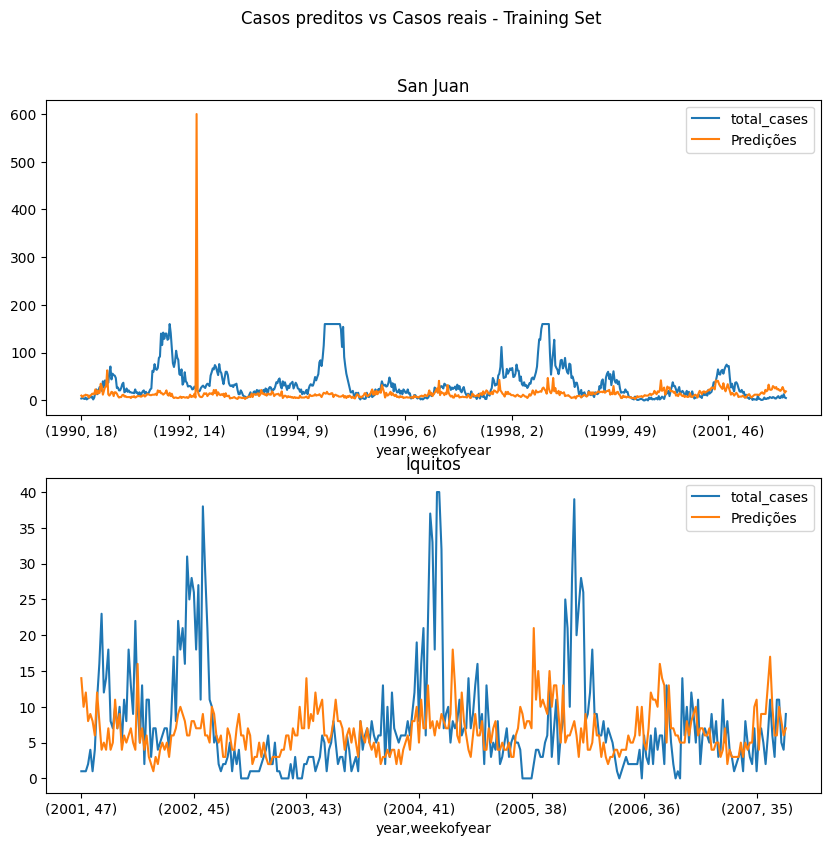

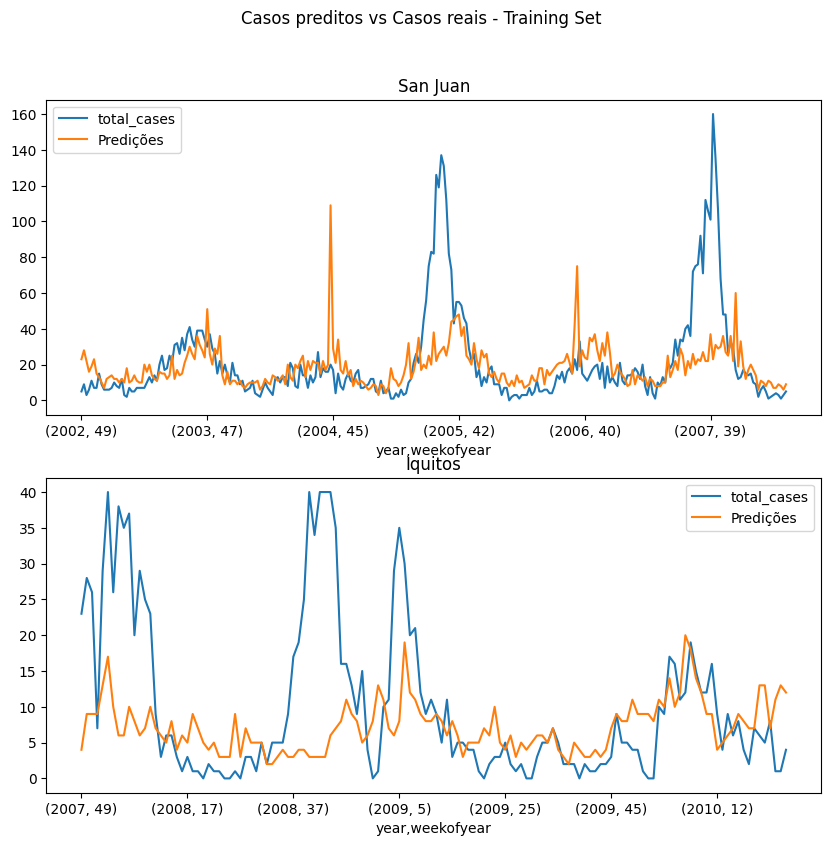

In [36]:
#Insample predictions
sj_preds2 = np.round(poisson_model_shift_sj.predict(sj_data_train))
iq_preds2 = np.round(poisson_model_shift_iq.predict(iq_data_train))

plot_predictions(sj_label_train,iq_label_train,sj_preds2,iq_preds2)

sj_valid_data = pd.concat([sj_data_train.iloc[-best_shift_sj:],sj_data_valid.iloc[:-best_shift_sj]],axis=0)
iq_valid_data = pd.concat([iq_data_train.iloc[-best_shift_iq:],iq_data_valid.iloc[:-best_shift_iq]],axis=0)
#Predições no conjunto de validação
sj_preds2 = np.round(poisson_model_shift_sj.predict(sj_valid_data))
iq_preds2 = np.round(poisson_model_shift_iq.predict(iq_valid_data))
plot_predictions(sj_label_valid,iq_label_valid,sj_preds2,iq_preds2)

In [37]:
print_MAE(sj_valid_data, iq_valid_data, poisson_model_shift_sj, poisson_model_shift_iq,sj_label_valid,iq_label_valid)

Erro Médio Absoluto com conjunto de validação:  13.195729537366548
Erro Médio Absoluto com conjunto de validação:  7.246268656716418
Erro Médio Absoluto Total:  11.274698795180722


<h3> Submissão dos dados de teste</h3>

In [38]:
#concatena as ultimas semanas de cada conjunto de treinamento ao conjunto de test
sj_test_data = pd.concat([sj_data.iloc[-best_shift_sj:],sj_test.iloc[:-best_shift_sj]],axis=0)
iq_test_data = pd.concat([iq_data.iloc[-best_shift_iq:],iq_test.iloc[:-best_shift_iq]],axis=0)

sj_predictions = np.round(poisson_model_shift_sj.predict(sj_test_data)).astype(int)
iq_predictions = np.round(poisson_model_shift_iq.predict(iq_test_data)).astype(int)

submission_format_file = os.path.join(data_path,'submission_format.csv')
submission = pd.read_csv(submission_format_file,index_col=[0, 1, 2])

submission['total_cases'] = np.concatenate([sj_predictions, iq_predictions])
submission_file = os.path.join(data_path,'submission2.csv')
submission.to_csv(submission_file)
print('Submission file 2 created!')

Submission file 2 created!


<h3>Trabalhos Futuros</h3>

Apesar dos ajustes para tentar criar um modelo que respondesse melhor ao conjunto de validação, os resultados para o conjunto de teste disponibilizado pelo DrivenData não foram tão melhores.

Como próximas etapas para este trabalho, pode-se listar:
<ul>
    <li>Testar outros modelos de regressão como RandomForest, GrandientBoost.</li>
    <li>Testar modelos de redes neurais recorrentes.</li>
</ul>